In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

### Task 1: Initial Data Exploration

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df.shape

(1003, 17)

In [4]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle         NaN         7  16.2155  340.5255   3/3/2019   
3       Health and beauty         NaN         8  23.2880  489.0480  1/27/2019   
4       Sports and travel         NaN         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

### Task 2: Univariate Analysis

In [7]:
df['Date']

0        1/5/2019
1        3/8/2019
2        3/3/2019
3       1/27/2019
4        2/8/2019
          ...    
998     2/22/2019
999     2/18/2019
1000     2/9/2019
1001    2/22/2019
1002    2/18/2019
Name: Date, Length: 1003, dtype: object

In [8]:
#fixing data type of Date column
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-09
1001   2019-02-22
1002   2019-02-18
Name: Date, Length: 1003, dtype: datetime64[ns]

In [9]:
df.set_index('Date', inplace=True)
df.describe()

Unit price     Quantity       Tax 5%        Total         cogs  \
count  985.000000  1003.000000  1003.000000  1003.000000  1003.000000   
mean    55.651411     5.502493    15.369064   322.750340   307.381276   
std     26.575973     2.926366    11.715911   246.034127   234.318216   
min     10.080000     1.000000     0.508500    10.678500    10.170000   
25%     32.620000     3.000000     5.833250   122.498250   116.665000   
50%     55.390000     5.000000    12.080000   253.680000   241.600000   
75%     78.070000     8.000000    22.460500   471.670500   449.210000   
max     99.960000    10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.369064     6.970189  
std               6.220351e-14     11.715911     1.718596  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.833250     5.500000  
50%               4.761905e+00     12.080000     7.000000  
75%               4.761905e+00     22.460500     8.500000  
max               4.761905e+00     49.650000    10.000000

In [10]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

C:\Users\ashut\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


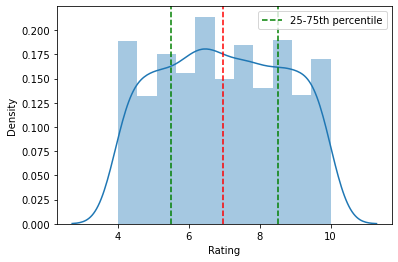

In [11]:
# Distribution of customer rating
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls="--")
plt.axvline(x=np.percentile(df['Rating'],25),c="green",ls="--")
plt.axvline(x=np.percentile(df['Rating'],75),c="green",ls="--",label='25-75th percentile')
plt.legend()

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

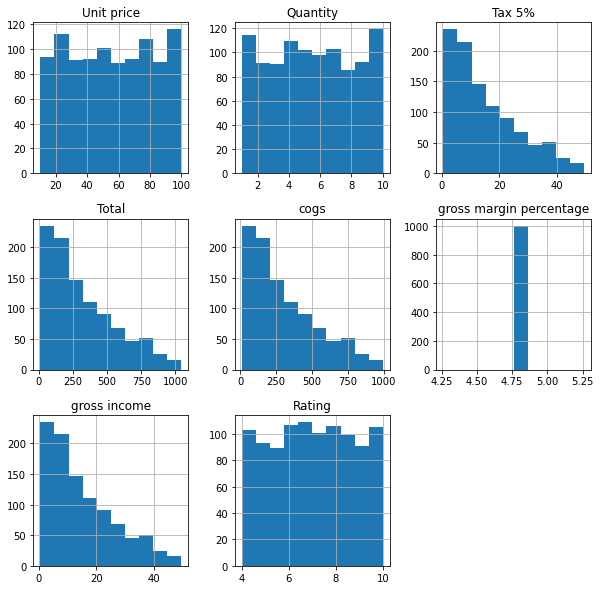

In [12]:
df.hist(figsize=(10,10))

C:\Users\ashut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

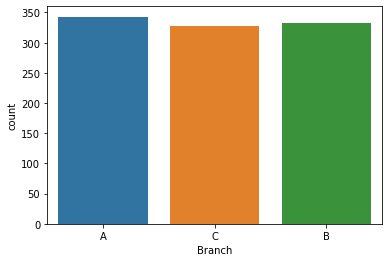

In [13]:
sns.countplot(df['Branch'])

In [14]:
df['Branch'].value_counts()

A    343
B    332
C    328
Name: Branch, dtype: int64

C:\Users\ashut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

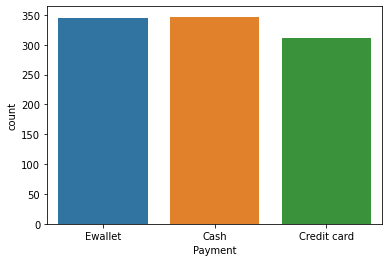

In [15]:
sns.countplot(df['Payment'])

### Task 3: Bivariate Analysis

C:\Users\ashut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

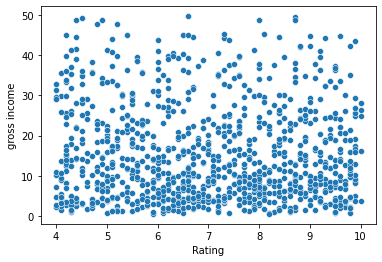

In [16]:
# is there a relationship between gross income and customer rating
sns.scatterplot(df['Rating'],df['gross income'])

C:\Users\ashut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

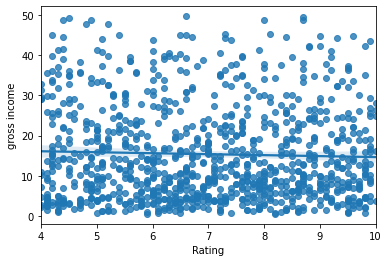

In [17]:
sns.regplot(df['Rating'],df['gross income'])

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

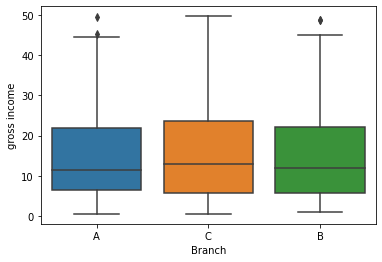

In [18]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

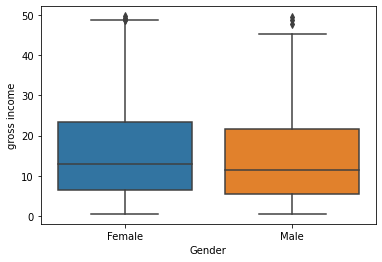

In [19]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

In [20]:
# is there a noticeable time trend in gross income
df.groupby(df.index).mean()

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   53.394545  6.750000  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   65.627143  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  6.090909  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

<AxesSubplot:xlabel='Date', ylabel='gross income'>

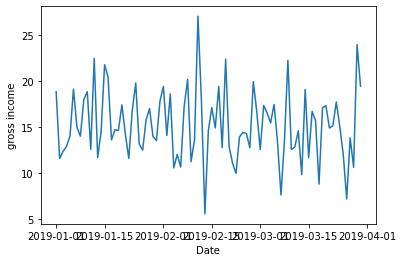

In [21]:
sns.lineplot(x=df.groupby(df.index).mean().index, y=df.groupby(df.index).mean()['gross income'])

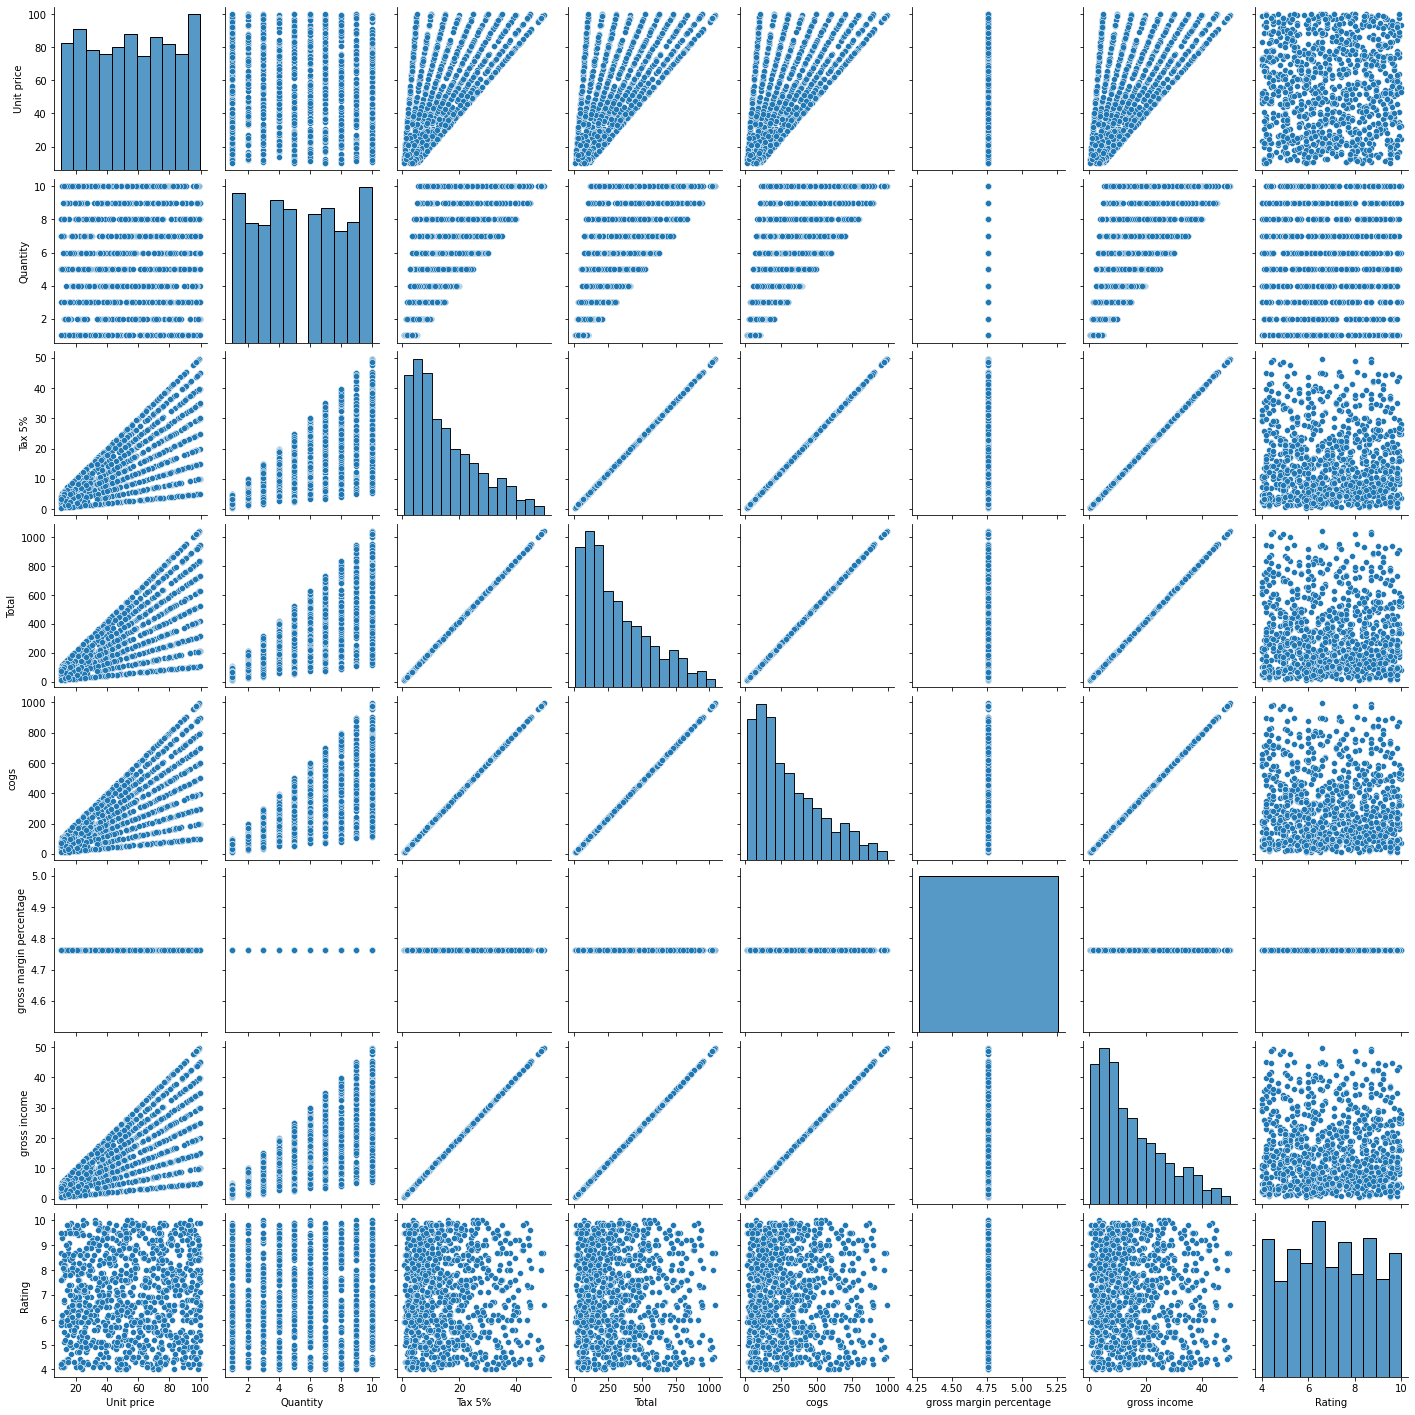

In [22]:
sns.pairplot(df)

### Task 4: Dealing With Duplicate Rows and Missing Values

In [23]:
df.duplicated().sum()

3

In [24]:
df[df.duplicated()==True]

Invoice ID Branch    City Customer type  Gender  \
Date                                                           
2019-02-09  727-02-1313      A  Yangon        Member    Male   
2019-02-22  347-56-2442      A  Yangon        Normal    Male   
2019-02-18  849-09-3807      A  Yangon        Member  Female   

                   Product line  Unit price  Quantity  Tax 5%    Total   Time  \
Date                                                                            
2019-02-09   Food and beverages       31.84         1   1.592   33.432  13:22   
2019-02-22   Home and lifestyle       65.82         1   3.291   69.111  15:33   
2019-02-18  Fashion accessories       88.34         7  30.919  649.299  13:28   

           Payment    cogs  gross margin percentage  gross income  Rating  
Date                                                                       
2019-02-09    Cash   31.84                 4.761905         1.592     7.7  
2019-02-22    Cash   65.82                 4.761905         3.291     4.1  
2019-02-18    Cash  618.38                 4.761905        30.919     6.6

In [25]:
#missing values
df.isna().sum()/len(df)

Invoice ID                 0.000000
Branch                     0.000000
City                       0.000000
Customer type              0.014955
Gender                     0.000000
Product line               0.008973
Unit price                 0.017946
Quantity                   0.000000
Tax 5%                     0.000000
Total                      0.000000
Time                       0.000000
Payment                    0.000000
cogs                       0.000000
gross margin percentage    0.000000
gross income               0.000000
Rating                     0.000000
dtype: float64

<AxesSubplot:ylabel='Date'>

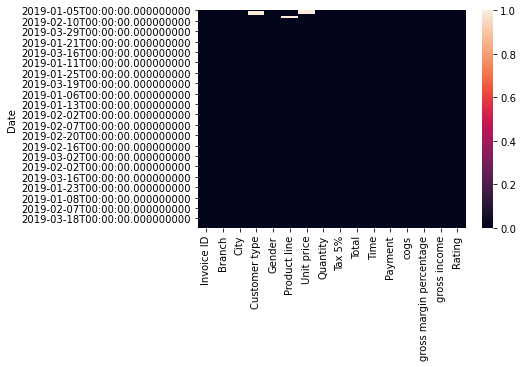

In [26]:
sns.heatmap(df.isnull())

In [27]:
df.fillna(df.mean(),inplace=True)

In [29]:
df.fillna(df.mode().iloc[0],inplace=True)

<AxesSubplot:ylabel='Date'>

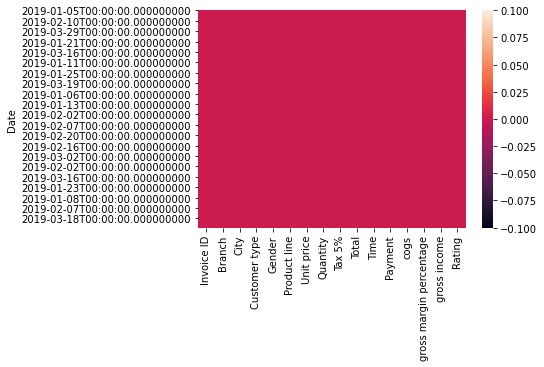

In [30]:
sns.heatmap(df.isnull())

In [32]:
dataset=pd.read_csv('supermarket_sales.csv')
prof=ProfileReport(dataset)
prof

### Task 5: Correlation Analysis

In [33]:
round(np.corrcoef(df['gross income'],df['Rating'])[1][0],2)

-0.04

In [34]:
np.round(df.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.71   0.71  0.71   
Tax 5%                         0.63      0.71    1.00   1.00  1.00   
Total                          0.63      0.71    1.00   1.00  1.00   
cogs                           0.63      0.71    1.00   1.00  1.00   
gross margin percentage       -0.00     -0.00    0.00   0.00  0.00   
gross income                   0.63      0.71    1.00   1.00  1.00   
Rating                        -0.01     -0.01   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                  -0.0          0.63   -0.01  
Quantity                                    -0.0          0.71   -0.01  
Tax 5%                                       0.0          1.00   -0.04  
Total                                        0.0          1.00   -0.04  
cogs                                         0.0          1.00   -0.04  
gross margin percentage                      1.0          0.00    0.00  
gross income                                 0.0          1.00   -0.04  
Rating                                       0.0         -0.04    1.00

<AxesSubplot:>

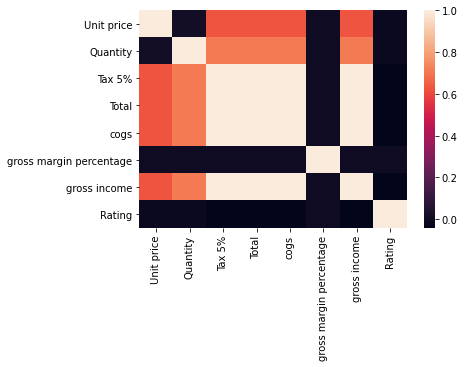

In [35]:
sns.heatmap(np.round(df.corr(),2))

<AxesSubplot:>

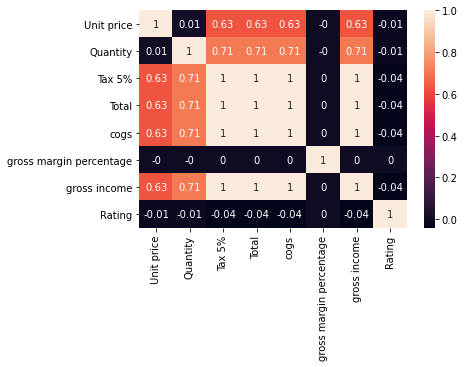

In [36]:
sns.heatmap(np.round(df.corr(),2),annot=True)